## ***Import Libraries***

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 24.2 MB/s eta 0:00:00


In [2]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import cv2
from ultralytics import YOLO
import torch
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## ***Data Visualization-Preparing-Preprocessing***

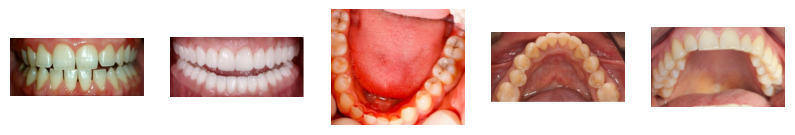

In [3]:
train_images_path = '/kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/train/images'
images_list = []
for i in os.listdir(train_images_path):
    images_list.append(i)

plt.figure(figsize=(10, 10))
for i in range(5):
    img_path = os.path.join(train_images_path, images_list[i])
    img = Image.open(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

## ***Building YOLO Model and Training***

In [4]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [5]:
import wandb
wandb.login(key="52c39486dfaa8f699590****************")

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [6]:
class YOLOTrainer:
    def __init__(self, task='', mode='', model='', imgsz=640, data='',
                 epochs=None, batch=None, learning_rate=None, optimizer=None, weight_decay=None, name='', exist_ok=True):
        self.task = task
        self.mode = mode
        self.model = model
        self.imgsz = imgsz
        self.data = data
        self.epochs = epochs
        self.batch = batch
        self.name = name
        self.exist_ok = exist_ok
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.weight_decay = weight_decay
    def load_model(self):
        model = YOLO(self.model)
        return model
    def train(self):
        # Train the model
        model = self.load_model()
        model.train(task=self.task, mode=self.mode, data=self.data, epochs=self.epochs, batch=self.batch, imgsz=self.imgsz,
                    name=self.name, exist_ok=self.exist_ok, lr0=self.learning_rate,
                    optimizer=self.optimizer, weight_decay=self.weight_decay)

In [7]:
yaml_path = '/kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/data.yaml'

trainer = YOLOTrainer(task='detect', mode='train', model='yolov9s.pt', imgsz=640,
                      data=yaml_path, epochs=50, batch=32, learning_rate=0.001, optimizer='Adam',
                      weight_decay=0.001, name='yolov9s', exist_ok=True)
trainer.train()

100%|██████████| 14.7M/14.7M [00:00<00:00, 116MB/s] 


Ultralytics 8.3.9 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov9s, exist_ok=True, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

100%|██████████| 755k/755k [00:00<00:00, 20.9MB/s]
2024-10-10 13:15:07,675	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-10 13:15:09,025	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     31104  ultralytics.nn.modules.block.ELAN1           [64, 64, 64, 32]              
  3                  -1  1     73984  ultralytics.nn.modules.block.AConv           [64, 128]                     
  4                  -1  1    258432  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 128, 128, 64, 3]        
  5                  -1  1    221568  ultralytics.nn.modules.block.AConv           [128, 192]                    
  6                  -1  1    579648  ultralytics.nn.modules.block.RepNCSPELAN4    [192, 192, 192, 96, 3]        
  7                  -1  1    442880  ultralytics

wandb: Currently logged in as: bilal9799 (bilal9799-sakarya-niversitesi). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.3
wandb: Run data is saved locally in /kaggle/working/wandb/run-20241010_131523-dsxoxmd1
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run yolov9s
wandb: ⭐️ View project at https://wandb.ai/bilal9799-sakarya-niversitesi/Ultralytics
wandb: 🚀 View run at https://wandb.ai/bilal9799-sakarya-niversitesi/Ultralytics/runs/dsxoxmd1


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 78.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/train/labels... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:01<00:00, 305.73it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/valid/labels... 112 images, 0 backgrounds, 0 corrupt: 100%|██████████| 112/112 [00:00<00:00, 279.36it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/valid is not writeable, cache not saved.
Plotting labels to runs/detect/yolov9s/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 227 weight(decay=0.0), 234 weight(decay=0.001), 233 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov9s
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.6G      1.096      3.677      1.201       1005        640: 100%|██████████| 16/16 [00:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all        112       2437    0.00148      0.123    0.00879    0.00425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.5G     0.9119      1.958      1.016        927        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:02<00:02,  2.86s/it]

WARNING ⚠️ NMS time limit 4.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.87s/it]

                   all        112       2437     0.0291      0.109     0.0531     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.8G      0.887      1.381     0.9973       1307        640: 100%|██████████| 16/16 [00:12<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all        112       2437      0.108      0.375       0.25      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.7G     0.8826       1.05      1.001       1126        640: 100%|██████████| 16/16 [00:11<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all        112       2437      0.127       0.43      0.399        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.3G      0.857     0.8966     0.9944       1002        640: 100%|██████████| 16/16 [00:11<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all        112       2437      0.613      0.428      0.628      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.6G     0.8411     0.7947     0.9826        982        640: 100%|██████████| 16/16 [00:11<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all        112       2437      0.971      0.392      0.733      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50        11G     0.8298     0.7467     0.9779       1003        640: 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all        112       2437      0.826       0.42      0.766      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.5G     0.8229     0.6879      0.986        875        640: 100%|██████████| 16/16 [00:11<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all        112       2437      0.879       0.68      0.889      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50        11G     0.8111     0.6337      0.978       1015        640: 100%|██████████| 16/16 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all        112       2437      0.857      0.859      0.933      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.3G     0.8056     0.6165     0.9742        997        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all        112       2437       0.88      0.889      0.937      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.7G     0.7897     0.5771     0.9695       1012        640: 100%|██████████| 16/16 [00:12<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all        112       2437      0.905      0.913      0.954       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.8G     0.7883     0.5495     0.9651       1206        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all        112       2437      0.921      0.934      0.957      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.2G     0.7884       0.54     0.9732       1044        640: 100%|██████████| 16/16 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all        112       2437      0.903      0.893      0.931      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.4G     0.7902     0.5373     0.9729       1111        640: 100%|██████████| 16/16 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all        112       2437      0.889      0.926      0.947       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.8G     0.7874     0.5228     0.9737        917        640: 100%|██████████| 16/16 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all        112       2437       0.94      0.939      0.969      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.2G     0.7785     0.5048     0.9648        996        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all        112       2437      0.939      0.943      0.973      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.8G     0.7613     0.4864     0.9594       1196        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all        112       2437      0.934      0.948      0.972      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.8G     0.7692     0.4834      0.967       1014        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all        112       2437      0.925      0.914      0.963      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.1G     0.7464     0.4709     0.9533       1042        640: 100%|██████████| 16/16 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all        112       2437      0.935      0.936      0.971       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.6G       0.76     0.4664      0.959       1104        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all        112       2437      0.945      0.938       0.97      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.1G     0.7551     0.4564      0.953       1100        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all        112       2437      0.931      0.943       0.97      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      12.3G     0.7462     0.4535     0.9527        982        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all        112       2437      0.956      0.955      0.979      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.4G     0.7393     0.4382      0.954       1123        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all        112       2437      0.915      0.918      0.952      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.7G     0.7525     0.4432     0.9621       1260        640: 100%|██████████| 16/16 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all        112       2437      0.931      0.942      0.968      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.3G     0.7316     0.4312     0.9541       1019        640: 100%|██████████| 16/16 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all        112       2437      0.941      0.949      0.973      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.2G     0.7478     0.4333     0.9599       1023        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all        112       2437      0.945      0.961      0.982      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.3G     0.7375     0.4283     0.9542        994        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all        112       2437      0.937      0.941      0.971      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.6G     0.7248     0.4167     0.9517        931        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all        112       2437      0.943      0.946      0.971      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.3G      0.721     0.4104     0.9461       1119        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all        112       2437      0.959      0.955      0.978      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.2G      0.734     0.4082     0.9496       1147        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all        112       2437      0.955      0.948      0.976      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.8G     0.7245     0.4005     0.9456       1153        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all        112       2437      0.954      0.958      0.978      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.1G     0.7208     0.3957     0.9448       1001        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all        112       2437      0.961      0.953      0.978      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.8G     0.7175     0.3933     0.9493        990        640: 100%|██████████| 16/16 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all        112       2437      0.957      0.951      0.976      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.4G     0.7066     0.3854     0.9335       1028        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all        112       2437      0.954      0.962      0.978      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50        12G     0.7075     0.3838     0.9429        988        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all        112       2437      0.959      0.965      0.979      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.8G      0.707      0.382     0.9398       1043        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all        112       2437       0.96      0.962      0.982      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.7G      0.707     0.3747     0.9415        906        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all        112       2437      0.954      0.967      0.979      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.7G     0.6977     0.3731     0.9372       1107        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all        112       2437      0.959       0.97       0.98      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.4G     0.6901     0.3661     0.9325       1098        640: 100%|██████████| 16/16 [00:11<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all        112       2437      0.959      0.957      0.977      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.8G     0.6832     0.3646     0.9315       1075        640: 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all        112       2437      0.944      0.965      0.977      0.771


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.2G     0.6894     0.4068     0.9414        504        640: 100%|██████████| 16/16 [00:12<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all        112       2437       0.95      0.946      0.973      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.2G     0.6762      0.362     0.9362        487        640: 100%|██████████| 16/16 [00:11<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all        112       2437      0.949      0.943      0.968      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.2G     0.6766     0.3486     0.9353        527        640: 100%|██████████| 16/16 [00:11<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all        112       2437       0.96      0.959      0.978      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.2G      0.669      0.335     0.9332        520        640: 100%|██████████| 16/16 [00:11<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all        112       2437      0.948      0.954      0.973      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.2G     0.6628     0.3317      0.935        543        640: 100%|██████████| 16/16 [00:11<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all        112       2437      0.956       0.96      0.974      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.2G     0.6601     0.3262     0.9274        461        640: 100%|██████████| 16/16 [00:11<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all        112       2437      0.949      0.961      0.973      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.2G     0.6492     0.3178     0.9207        481        640: 100%|██████████| 16/16 [00:11<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all        112       2437      0.966      0.962      0.981      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.2G     0.6469     0.3114     0.9238        514        640: 100%|██████████| 16/16 [00:11<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all        112       2437      0.963      0.968      0.983      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.2G     0.6483     0.3138     0.9135        496        640: 100%|██████████| 16/16 [00:11<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all        112       2437      0.962      0.965       0.98      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.2G      0.639     0.3065     0.9174        510        640: 100%|██████████| 16/16 [00:11<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all        112       2437       0.96      0.964      0.978      0.782



50 epochs completed in 0.206 hours.
Optimizer stripped from runs/detect/yolov9s/weights/last.pt, 13.3MB
Optimizer stripped from runs/detect/yolov9s/weights/best.pt, 13.3MB

Validating runs/detect/yolov9s/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 504 layers, 6,196,357 parameters, 0 gradients, 22.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]


                   all        112       2437      0.963      0.967      0.983      0.783
             1st Molar        106        323      0.935      0.936      0.968      0.689
          1st Premolar        111        386       0.98      0.995       0.99      0.807
             2nd Molar         74        157      0.899      0.892      0.953      0.632
          2nd Premolar        109        364      0.962      0.979      0.987      0.735
                Canine        112        401      0.978      0.992      0.993      0.854
       Central Incisor        112        403      0.998      0.997      0.995      0.892
       Lateral Incisor        112        403      0.988      0.983      0.995      0.869
Speed: 0.1ms preprocess, 3.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/yolov9s


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 █▇▅▄▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:                  lr/pg1 ▂▃▅▇█████▇▇▇▇▇▆▆▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁
wandb:                  lr/pg2 ▂▃▄▆▇████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁
wandb:        metrics/mAP50(B) ▁▁▃▄▅▆▇█████████████████████████████████
wandb:     metrics/mAP50-95(B) ▁▁▂▄▅▆▇▇▇█▇█████████████████████████████
wandb:    metrics/precision(B) ▁▁▂▂▅▇▇▇▇██▇████████████████████████████
wandb:       metrics/recall(B) ▁▃▄▄▃▆▇▇████████████████████████████████
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁
wandb:          train/cls_loss █▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:          train/dfl_loss █▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▁▁▂▁▁▁▁▁▁▁
wandb:            val/box_loss ██▇▃▂▂▁▁▁▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁

## ***Prediction***

In [8]:
class YOLOTester:
    def __init__(self, model_path, source=''):
        self.model_path = model_path 
        self.source = source 

    def load_model(self):
        model = YOLO(self.model_path)
        return model

    def make_prediction(self):
        model = self.load_model()
        results = model.predict(source=self.source, save=False)
        return results

def draw_predictions(image_path, results, output_path=''):
    img = cv2.imread(image_path)
    
    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls = int(box.cls.item()) 
            score = box.conf.item() 
            label = f"{cls}: {score:.2f}"

            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Mavi kutu
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    cv2.imwrite(output_path, img)
    print(f"Prediction saved to {output_path}")

In [9]:
test_images_path = '/kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/test/images'
images_list = []
for i in os.listdir(train_images_path):
    images_list.append(i)

In [10]:
tester = YOLOTester(
    model_path='/kaggle/working/runs/detect/yolov9s/weights/best.pt',
    source= '/kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/test/images/Fig100_SAU_JPG.rf.79b3fc155a06f078d19333b496071469.jpg'  # Test dataset
)

results = tester.make_prediction()
draw_predictions(tester.source, results, output_path='/kaggle/working/prediction_result.jpg')


image 1/1 /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/test/images/Fig100_SAU_JPG.rf.79b3fc155a06f078d19333b496071469.jpg: 352x640 3 1st Molars, 4 1st Premolars, 2 2nd Molars, 4 2nd Premolars, 4 Canines, 4 Central Incisors, 4 Lateral Incisors, 67.2ms
Speed: 1.9ms preprocess, 67.2ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)
Prediction saved to /kaggle/working/prediction_result.jpg


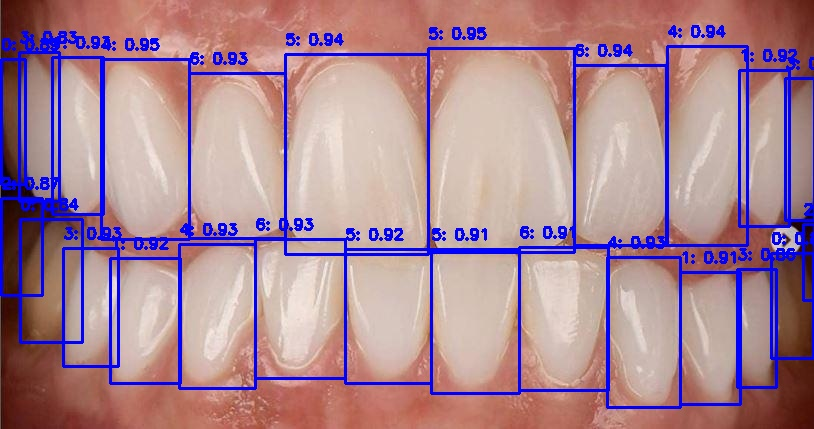

In [11]:
Image.open("/kaggle/working/prediction_result.jpg")